In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import lstm_model
from data_processing import generate_data, sin_cos

In [2]:
LOG_DIR = './ops_logs/sin_cos'
TIMESTEPS = 5
RNN_LAYERS = [{'num_units': 5}, {'num_units': 2}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [3]:
regressor = learn.SKCompat(learn.Estimator(
    model_fn=lstm_model(
        TIMESTEPS,
        RNN_LAYERS,
        DENSE_LAYERS
    ),
    model_dir=LOG_DIR
))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fba8c0c03d0>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


In [4]:
X, y = generate_data(sin_cos, np.linspace(0, 100, 10000, dtype=np.float32), TIMESTEPS, seperate=False)
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], 
              monitors=[validation_monitor], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin_cos/model.ckpt-20000
INFO:tensorflow:Saving checkpoints for 20001 into ./ops_logs/sin_cos/model.ckpt.
INFO:tensorflow:loss = 1.5049e-05, step = 20001
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from

INFO:tensorflow:global_step/sec: 667.633
INFO:tensorflow:loss = 1.03316e-05, step = 23501 (0.150 sec)
INFO:tensorflow:global_step/sec: 529.064
INFO:tensorflow:loss = 1.12464e-05, step = 23601 (0.189 sec)
INFO:tensorflow:global_step/sec: 528.753
INFO:tensorflow:loss = 1.91092e-05, step = 23701 (0.189 sec)
INFO:tensorflow:global_step/sec: 573.415
INFO:tensorflow:loss = 1.60847e-05, step = 23801 (0.175 sec)
INFO:tensorflow:global_step/sec: 556.402
INFO:tensorflow:loss = 9.26454e-06, step = 23901 (0.180 sec)
INFO:tensorflow:global_step/sec: 606.914
INFO:tensorflow:loss = 2.14155e-05, step = 24001 (0.165 sec)
INFO:tensorflow:global_step/sec: 567.901
INFO:tensorflow:loss = 9.90086e-06, step = 24101 (0.176 sec)
INFO:tensorflow:global_step/sec: 526.269
INFO:tensorflow:loss = 1.08341e-05, step = 24201 (0.190 sec)
INFO:tensorflow:global_step/sec: 619.03
INFO:tensorflow:loss = 1.05501e-05, step = 24301 (0.161 sec)
INFO:tensorflow:global_step/sec: 658.944
INFO:tensorflow:loss = 1.00762e-05, step =

SKCompat()

In [5]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin_cos/model.ckpt-30000
MSE: 0.000007


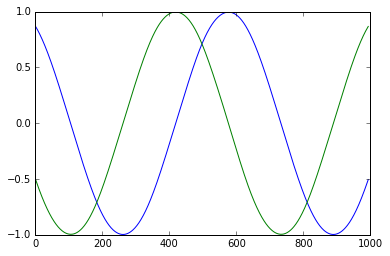

In [6]:
plt.plot(predicted)

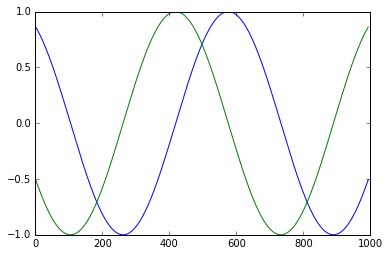

In [7]:
plt.plot(y['test'])

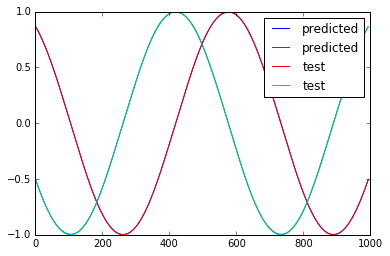

In [8]:
plot_predicted = plt.plot(predicted, label='predicted')
plot_test = plt.plot(y['test'], label='test')
plt.legend(handles=plot_predicted+plot_test)